In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect= True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
show = session.query(Measurements).first()
show.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1191f1400>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [10]:
# Find the most recent date in the data set.
order = session.query(Measurements.date).order_by(Measurements.date.desc()).first()

In [11]:
last = dt.datetime.strptime(order[0], "%Y-%m-%d")

first= dt.datetime(last.year -1, last.month, last.day).date()
print(first)

2016-08-23


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
precip_data = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date > first).order_by(Measurements.date)
precip_data.all()

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [13]:
# Starting from the most recent data point in the database. 
precip_df = pd.DataFrame(precip_data, columns= ["Date", "Precipitation"])
precip_df.set_index("Date")
precip_df.head(10)

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [14]:
# Calculate the date one year from the last date in data set.


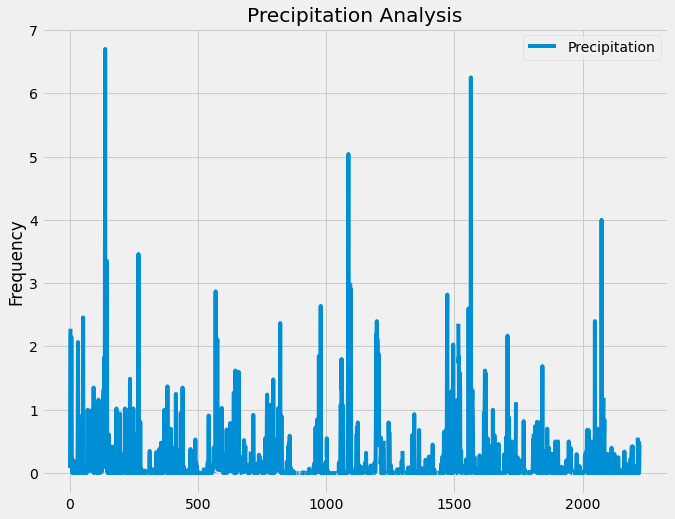

In [15]:
plot = precip_df.plot(figsize= (10,8))
plot.set_title("Precipitation Analysis")
plot.set_ylabel("Frequency")
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
show_stations = session.query(Stations).first()
show_stations.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x119a44430>,
 'id': 1,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [18]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurements).group_by(Measurements.station).count()
print(total_stations)

9


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurements.station, func.count(Measurements.station)).\
group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
print(most_active)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
recent_station = most_active[0][0]
low_high_avg = session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
    filter(Measurements.station==recent_station).all()
print(low_high_avg)

[(54.0, 85.0, 71.66378066378067)]


In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurements.station, Measurements.tobs).filter(Measurements.station == recent_station).\
    filter(Measurements.date >= first).all()
temp_obs_df = pd.DataFrame(temp_obs, columns= ["Stations", "tobs"])
temp_obs_df.set_index("Stations")
temp_obs_df.head(10)

,Stations,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
5,USC00519281,73.0
6,USC00519281,78.0
7,USC00519281,77.0
8,USC00519281,78.0
9,USC00519281,80.0


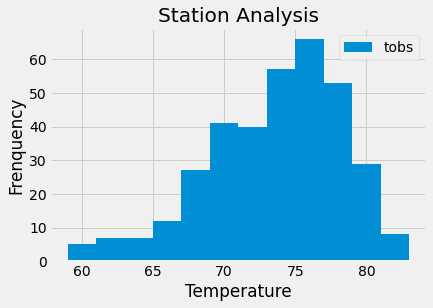

In [22]:
plt.hist(temp_obs_df["tobs"], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frenquency")
plt.title("Station Analysis")
plt.legend(["tobs"])
plt.show()

# Close session

In [23]:
# Close Session
session.close()